In [1]:
import numpy as np
# [0 0 1]
#[0 2 1]

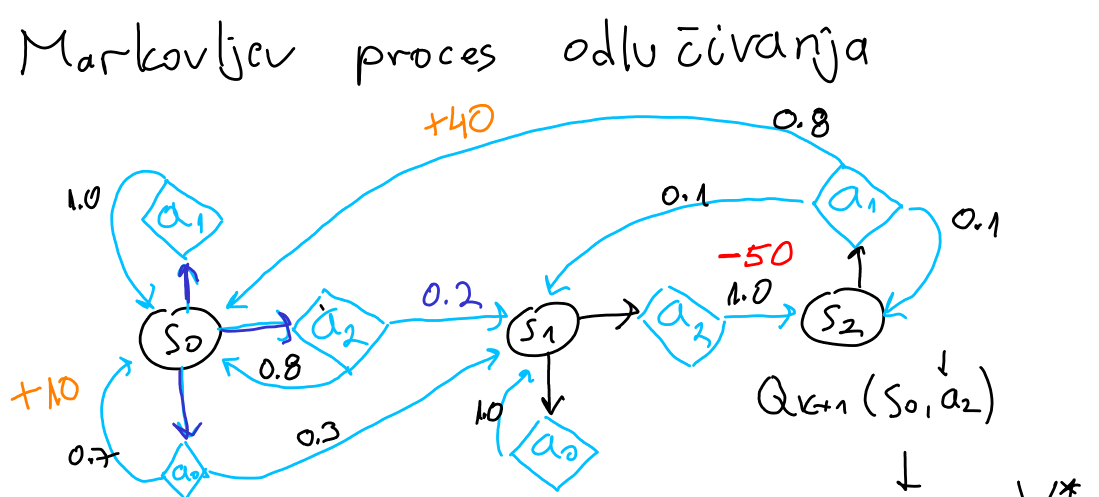

In [3]:
# T(s,a,s') shape=[len(S), len(A), len(S)]

T = [
     #a0              #a1              #a2 
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], #s0
    [[0.0, 1.0, 0.0], None,            [0.0, 0.0, 1.0]], #s1
    [None,            [0.8, 0.1, 0.1], None           ] #s2
]

In [13]:
T_s0 = T[0] # Verovatnoce prelaska u druga stanja za sve akcije koje mogu da se preduzmu u stannju s0
T_s0_a1 = T_s0[1] # Verovatnoce prelaska u susedna stanja s' akcijom a1
T_s0_a1[1] # verotvnoca prelaska iz stanja s0 u stanje s1, akcijom a1

0.0

In [18]:
# R(s, a, s') 
R = [
    # a0              #a1          #a2
    [[+10, 0.0, 0.0], [0,0,0],     [0,0,0]], # s0
    [[0, 0, 0],       [0,0,0],     [0,0,-50]], #s1
    [[0, 0, 0],       [+40, 0, 0], [0,0,0]]#s2
]
R

[[[10, 0.0, 0.0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
 [[0, 0, 0], [40, 0, 0], [0, 0, 0]]]

In [19]:
num_of_states = 3
num_of_actions = 3
R = np.zeros((num_of_states, num_of_actions, num_of_states))
R[0][0][0] = 10
R[1][2][2] = -50
R[2][1][0] = 40

In [17]:
R

array([[[ 10.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0., -50.]],

       [[  0.,   0.,   0.],
        [ 40.,   0.,   0.],
        [  0.,   0.,   0.]]])

# Q-iteration

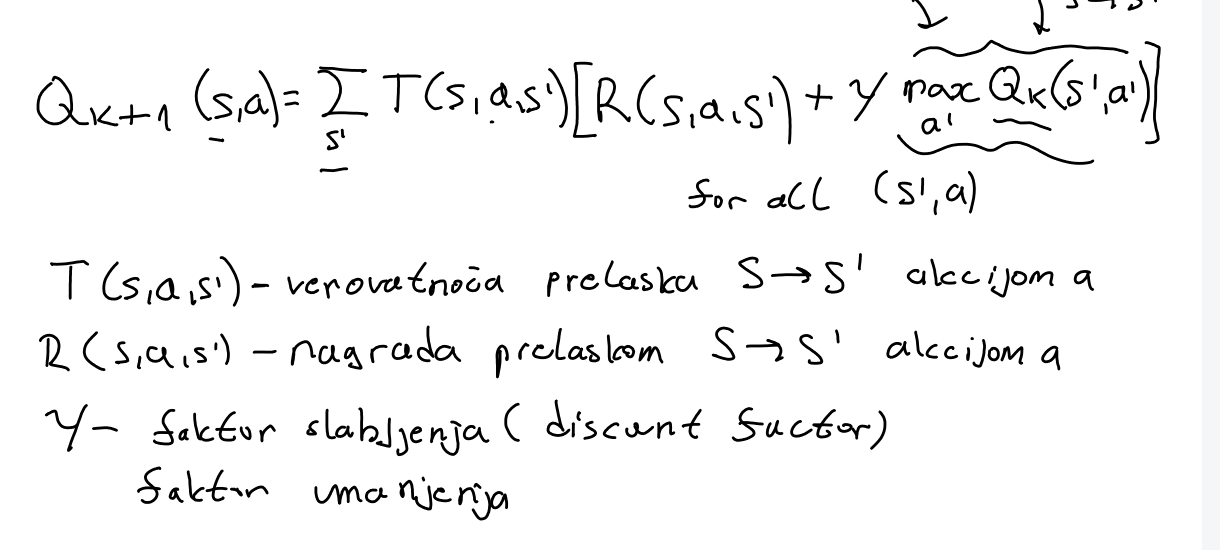

In [20]:
possible_actions = [[0,1,2], [0,2], [1]]
Q_values = np.full((3,3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0

In [28]:
gamma = 0.98 # faktor umanjenja

In [33]:
num_of_iterations = 50
for iteration in range(num_of_iterations):
    Q_prev = Q_values.copy()
    for s in range(num_of_states):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                T[s][a][sp]*(R[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(num_of_states)
            ])
print(Q_values)
print(np.argmax(Q_values, axis=1)) # optimalna akcija u svakom stanju
optimal_action_in_state = np.argmax(Q_values, axis=1)

[[53.46479671 52.28610347 48.40523229]
 [32.88174759        -inf 33.66443357]
 [       -inf 85.48350089        -inf]]
[0 2 1]


In [32]:
Q_values[0,1] 
# Agent u stanju s0, odabirom akcije a1 moze ocekivati umanjenju sumu buducih nagrada u iznosu od 42.73...

42.73586817474643

# Q-learning

In [34]:
T = [
     #a0              #a1              #a2 
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], #s0
    [[0.0, 1.0, 0.0], None,            [0.0, 0.0, 1.0]], #s1
    [None,            [0.8, 0.1, 0.1], None           ] #s2
]
R = [
    # a0              #a1          #a2
    [[+10, 0.0, 0.0], [0,0,0],     [0,0,0]], # s0
    [[0, 0, 0],       [0,0,0],     [0,0,-50]], #s1
    [[0, 0, 0],       [+40, 0, 0], [0,0,0]]#s2
]
R

[[[10, 0.0, 0.0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
 [[0, 0, 0], [40, 0, 0], [0, 0, 0]]]

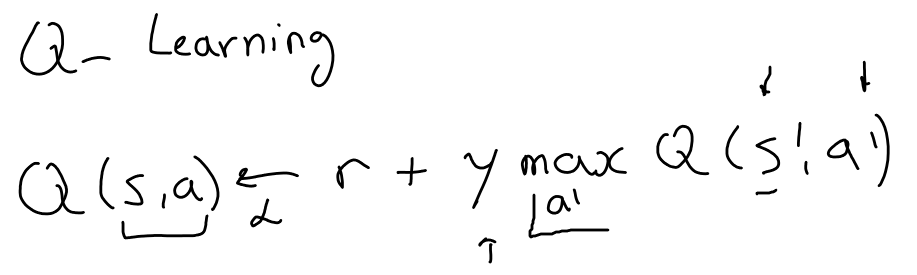

In [43]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [53]:

def step(state, action):
    p = T[state][action]
    next_state = np.random.choice([0,1,2], p=p)
    r = R[state][action][next_state]
    return next_state, r

[1.0, 0.0, 0.0]


In [48]:
alpha0 = 0.05 # initicijalna brzina ucenja
decay = 0.005 # umnjanje brzine ucenja
gamma = 0.98 # faktor umanjenja buduce nagrde
state = 0

Q_values = np.full((3,3), -np.inf)
for state, action in enumerate(possible_actions):
    Q_values[state][action] = 0

num_of_iterations = 10000
for iteration in range(num_of_iterations):
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state])
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

In [49]:
print(Q_values)

[[20.0061279  18.7480822  14.78839323]
 [ 0.                -inf -3.38810266]
 [       -inf 51.25526527        -inf]]


In [50]:
print(Q_values)
print(np.argmax(Q_values, axis=1)) # optimalna akcija u svakom stanju
optimal_action_in_state = np.argmax(Q_values, axis=1)

[0 0 1]


# Reference
Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd edition; pages 